<a href="https://colab.research.google.com/github/murakami-hy/-Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandasをつかって外食をするお店を提案してくれるプログラムをつくりました。

ランキングや予算、ジャンルから検索できます。
また、ランダムにお店を提案してくれる機能もつくりました。


はじめに以下の2つのセルを実行してください。

In [3]:
!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=1fW9u91uceQ7Hth0hHRi7utr8SaaI461N" > /dev/null
!CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"  
!curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=1fW9u91uceQ7Hth0hHRi7utr8SaaI461N" -o map.zip
!unzip -o map.zip

awk: cannot open /tmp/cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 36.6M  100 36.6M    0     0  82.4M      0 --:--:-- --:--:-- --:--:--  348M
Archive:  map.zip
  inflating: map/1.png               
  inflating: map/10.png              
  inflating: map/100.png             
  inflating: map/11.png              
  inflating: map/12.png              
  inflating: map/13.png              
  inflating: map/14.png              
  inflating: map/15.png              
  inflating: map/16.png              
  inflating: map/17.png              
  inflating: map/18.png              
  inflating: map/19.png              
  inflating: map/2.png               
  inflating: map/20.png              
  inflating: map/21.png              
  inflating: map/22.png              
 

In [4]:
!wget "https://drive.google.com/uc?export=download&id=19PT0zIGU41Hd2SOBbeE6sSELqsOANFj1" -O work1.csv

--2022-12-23 08:28:28--  https://drive.google.com/uc?export=download&id=19PT0zIGU41Hd2SOBbeE6sSELqsOANFj1
Resolving drive.google.com (drive.google.com)... 173.194.211.102, 173.194.211.139, 173.194.211.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3l0jsh2rqlq3cm7chipvnmkrjql7sqdb/1671784050000/00201175039690402368/*/19PT0zIGU41Hd2SOBbeE6sSELqsOANFj1?e=download&uuid=f2b5aecf-3347-4e14-be57-e47585be8edf [following]
--2022-12-23 08:28:28--  https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3l0jsh2rqlq3cm7chipvnmkrjql7sqdb/1671784050000/00201175039690402368/*/19PT0zIGU41Hd2SOBbeE6sSELqsOANFj1?e=download&uuid=f2b5aecf-3347-4e14-be57-e47585be8edf
Resolving doc-0g-0g-docs.googleusercontent.com (doc-0g-0g-docs.googleusercontent.com)... 108.177.12.132, 2

広島県のおいしいお店を提案します
検索方法を選択してください   1:食べログランキング(12月21日現在)   2:値段   3:ジャンル   4:ランダム
数字を入力してください 3
ジャンルを入力してください　例：ラーメン、イタリアン、カフェなど
ジャンル: 洋食
他の言葉を入力してください
ジャンル: ラーメン


,ジャンル,店名
29,ラーメン,中華そば 陽気
58,ラーメン,尾道ラーメン 一丁
62,ラーメン,中華そば くにまつ
64,ラーメン,らーめん ふじもと
72,ラーメン,らーめん与壱
74,ラーメン,太華園
75,ラーメン,中華そば そのだ
76,ラーメン,麺処 いつか


ラーメンでよろしいですか？
1:はい  2:いいえ  2
ジャンルを入力してください　例：ラーメン、イタリアン、カフェなど
ジャンル: 和食
他の言葉を入力してください
ジャンル: 寿司


,ジャンル,店名
27,寿司,吉鮨
31,寿司,鮨処ひと志
97,寿司,すし博


寿司でよろしいですか？
1:はい  2:いいえ  1
さらに店の詳細を調べることができます。表を参考に、気になるお店のインデックス(一番左の数字)を入力してください
インデックス？97
すし博の詳細を表示します
12月21日時点で食べログランキング319位です
予算は6000円です
予約は不要です
最寄り駅は広島駅です
定休日は水曜、日曜、祝日です
周辺地図はこちらです


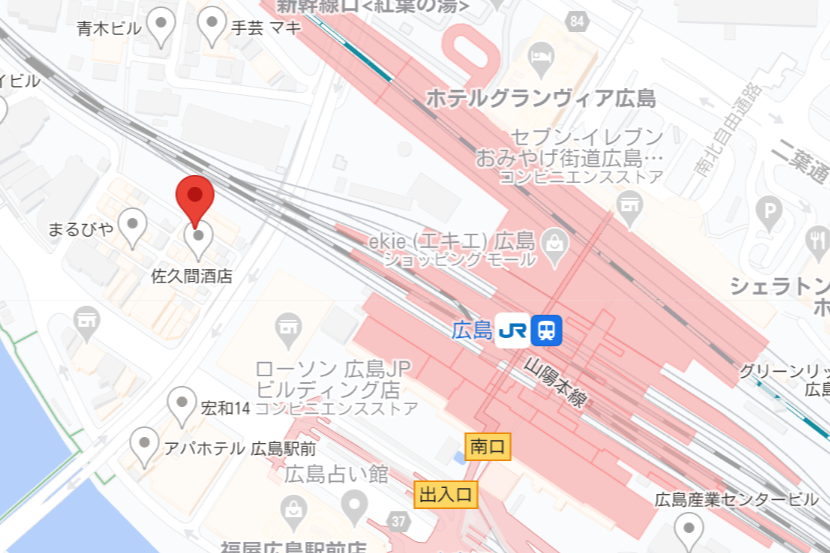

ほかの店の詳細も調べますか？
1:はい　2:いいえ 2
ありがとうございました


In [14]:
from IPython.display import display
import pandas as pd
import random
import numpy as np
import cv2, sys, glob
from google.colab.patches import cv2_imshow

def syousai():
 while True:
   print('さらに店の詳細を調べることができます。表を参考に、気になるお店のインデックス(一番左の数字)を入力してください')
   i=int(input('インデックス？'))
   print(df.at[i,'店名']+'の詳細を表示します')
   print('12月21日時点で食べログランキング'+str(df.at[i,'ランキング'])+'位です')
   print('予算は'+str(df.at[i,'予算'])+'円です')
   print('予約は'+df.at[i,'予約']+'です')
   print('最寄り駅は'+df.at[i,'最寄り駅']+'です')
   if df.at[i,'定休日']!='不定休':
    print('定休日は'+df.at[i,'定休日']+'です')
   print('周辺地図はこちらです')
   file ='map/'+df.at[i,'地図']
   img = cv2.imread( file )
   if img is None:
    sys.exit(f'エラー: ファイルを開けませんでした {file}')
   cv2_imshow(img)
   print('ほかの店の詳細も調べますか？')
   c=int(input('1:はい　2:いいえ '))
   if c==2:
    print('ありがとうございました')
    break

df=pd.read_csv('work1.csv')
print('広島県のおいしいお店を提案します')
print('検索方法を選択してください   1:食べログランキング(12月21日現在)   2:値段   3:ジャンル   4:ランダム')
x=int(input('数字を入力してください '))

if x==1:
 while True:
  print('ランキング上位〇店を表示します (〇≦30)')
  maru=int(input('〇＝ '))
  display(df[df['ランキング']<=maru][['ランキング','店名','ジャンル']])
  print('上位'+str(maru)+'位まででよろしかったですか？')
  a=int(input('1:OK   2:選択しなおす '))
  if a==1:
    break
 syousai()

elif x==2:
  while True:
    print('〇円以内のお店を表示します')
    d=int(input('〇＝'))
    df2=df.sort_values('予算',ascending=False)
    display(df2[df2['予算']<=d][['予算','店名','ジャンル']])
    print(str(d)+'円以内でよろしいですか？')
    e=int(input('1:はい　2:いいえ　'))
    if e==1:
      break
  syousai()

elif x==3:
 while True:
  print('ジャンルを入力してください　例：ラーメン、イタリアン、カフェなど') 
  while True: 
   j=input('ジャンル: ')
   if len(df[df['ジャンル']==j])==0:
    print('他の言葉を入力してください')
   else:
     break
  display(df[df['ジャンル']==j][['ジャンル','店名']])
  print(j+'でよろしいですか？')
  f=int(input('1:はい  2:いいえ  '))
  if f==1:
    break
 syousai()

elif x==4:
 print('ランダムにお店を提案します')
 while True:
  r=random.randint(0,99)
  display(df.iloc[[r]][['店名','ジャンル']])
  print('詳細を調べますか？')
  g=int(input('1:はい　2:いいえ　'))
  if g==1:
   print(df.at[r,'店名']+'の詳細を表示します')
   print('12月21日時点で食べログランキング'+str(df.at[r,'ランキング'])+'位です')
   print('予算は'+str(df.at[r,'予算'])+'円です')
   print('予約は'+df.at[r,'予約']+'です')
   print('最寄り駅は'+df.at[r,'最寄り駅']+'です')
   if df.at[r,'定休日']!='不定休':
     print('定休日は'+df.at[r,'定休日']+'です')
   print('周辺地図はこちらです')
   file ='map/'+df.at[r,'地図']
   img = cv2.imread( file )
   if img is None:
    sys.exit(f'エラー: ファイルを開けませんでした {file}')
   cv2_imshow(img)
  print('他のお店をみますか？')
  h=int(input('1:はい　2:いいえ　')) 
  if h==2:
    break 
 print('ありがとうございました')
else:
  print('1～4を入力してください')